## Polynomial Regression
### Python Implementation of Polynomial Regression from scratch
Polynomial Regression is a form of linear regression in which the relationship between a **scalar dependent variable** *y*  and one or more **independent variables (explanatory variables) x** is modelled as a **nth** degree polynomial. Polynomial regression fits a non-linear relationship between the values of *x* and *y* by transforming the features of x into polynomial features of *nth* degreee.
$$  x = (x_0,x_1,x_2,z_d) \overset{\phi}{\rightarrow} z = (z_0,z_1,z_2,z_{-n}) $$  

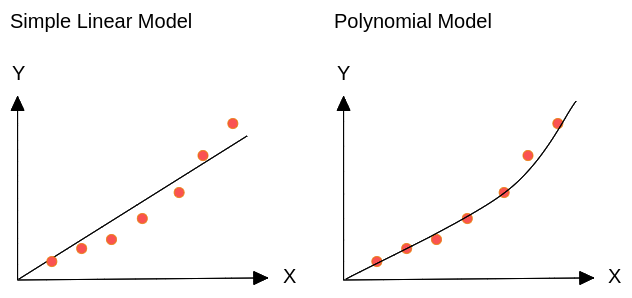
 Although a non linear curve was fit between *x* and *y*, the relationship is linear in the unknown parameters **w** that are estimated from the data i.e the relationship is linear in the new input space **Z**. The explanatory (independent) variables resulting from the polynomial expansion of the *x* are known as higher-degree terms.
### Notation and Definitions:  
- $y:   $    target value. 
- $\boldsymbol{x}:   $    independent (explanatory) variable also known as the input variable or feature.
- $\alpha:$ is the learning rate which determmines the step size at each iteration
- $\boldsymbol{w},b :   $ are the parameters of the algorithm
- $f_{\boldsymbol{w},b}(x^{(i)}):  $ is our prediction for example $i$ using parameters $\boldsymbol{w},b$.
- $\boldsymbol{D} = \{{\boldsymbol{(x^{(1)}},y^{(1)})},...,\boldsymbol{(x^{(n)}},y^{(n)})\}$: is the set of n training examples, where:
    - $\boldsymbol{(x^{(i)}}) $ is the $d$ dimensional input vector ;being the feature vector consisting of$ (x_1,x_2, ...x_d)$ of the training example $\boldsymbol{i}$ 
    - $y^{(i)}$ is the desired output value for that input vector
- $(\boldsymbol{x^{(i)}},y^{(i)})$: an instance of a training example.


### Training 
Polynomial Regression has the same sequence of steps in training as the ordinary linear regression with the only difference that the features are transformed into polnomial features before being passed into the model.


In [3]:
## Importing required modules
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

np.random.seed(126)

### Generating the Dataset

In [153]:
m=5_000 # Number of samples
X= np.random.randn(m,1) ## Generating 1_000 values for x and adding noise to the data
y = 0.3*X+ 0.7*(X**2) +2*(X**3)+ 2+np.random.randn(m,1) ## y is cubic polynomial of x

## Splitting our data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [125]:
print(f"The shape of X_train :{X_train.shape}")
print(f"The shape of y_train :{y_train.shape}")

The shape of X_train :(4000, 1)
The shape of y_train :(4000, 1)


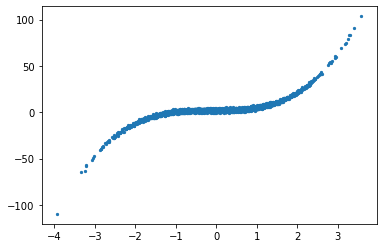

In [154]:
plt.scatter(X_train,y_train,s=5)

### Training our model

#### First we try to predict the value of x without using polynomial features

In [162]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [163]:
reg.score(X_train,y_train)

0.5911691007975739

### The model achieve accuracy of just 0.59 on the training data
Ploting the linear function shows the model tries to fit a line to model the relationship

In [190]:
def plot_linear_function(coef):
    x= np.arange(-4,4)
    y = coef[0]*x
    plt.plot(x,y,c='r')
    plt.scatter(X_train,y_train,alpha=0.1)

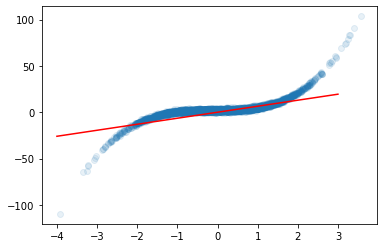

In [191]:
plot_linear_function(reg.coef_)

### Training our model using Polynomial Features

In [198]:
## Transform our input features into polynomial features of third degree
poly_features= PolynomialFeatures(3)
X_train_new = poly_features.fit_transform(X_train)
print(f"The shape of our the tranform X_train is {X_train_new.shape}")
print("The first 3 example our new X_train")
print(X_train_new[:3])

The shape of our the tranform X_train is (4000, 4)
The first 3 example our new X_train
[[ 1.00000000e+00  4.53053656e-02  2.05257615e-03  9.29927130e-05]
 [ 1.00000000e+00 -6.55120273e-03  4.29182572e-05 -2.81166204e-07]
 [ 1.00000000e+00  8.77987766e-01  7.70862517e-01  6.76807859e-01]]


### Fitting our model with polynomial features

In [214]:
poly_model = LinearRegression()
poly_model.fit(X_train_new,y_train)
score = poly_model.score(poly_features.transform(X_train),y_train)

print(f"Our model achieve a training score of: {score}")

Our model achieve a training score of: 0.9862331185396277


In [215]:
## Testing our model
X_test_new = poly_features.transform(X_test)
test_score = poly_model.score(X_test_new,y_test)
print(f"Our model achieve a test score of :{test_score}")

Our model achieve a test score of :0.9818905745344932
